# Flights Data (California 2019)
## by Imene KOLLI

## Investigation Overview

> In this investigation, I wanted to look at the main reasons why flights get delayed or cancelled. Also, Where and when do these delays and cancellation usually occure.

## Dataset Overview

> The data consists of scheduled and actual departure and arrival flights' details for all commercial flights reported by certified U.S. air carriers within the USA state of California in 2019. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('flight_master.csv')
df_cancelled = pd.read_csv('flight_cancelled.csv')

## Distribution of DEPARTURE DELAY

Departure delays in the dataset take on a very large range of values, from negative values meaning early departures with -34min at the lowest, to 2209min at the highest. using an axis limit of [-10 , 200] we can see it's a normal distribution.

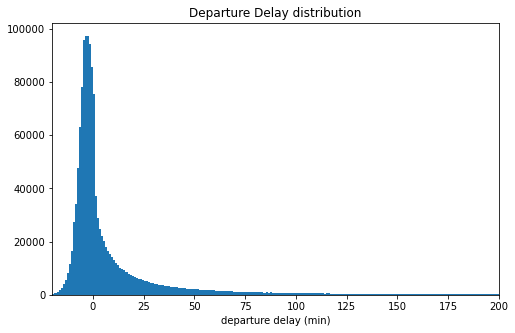

In [3]:
plt.figure(figsize=[8, 5])

bin_edges = np.arange(-20, 201+1,1)
plt.hist(data = df, x = 'DEP_DELAY', bins = bin_edges)
plt.xlim(-20, 200)
plt.title('Departure Delay distribution')
plt.xlabel('departure delay (min)');

## Cancelled flights reasons:

> This plot gives us a great insight on what causes flights to be cancelled.
as a reminder, this is what each value in the variable mean :

- A = carrier 
- B = weather
- C = NAS 
- D = security

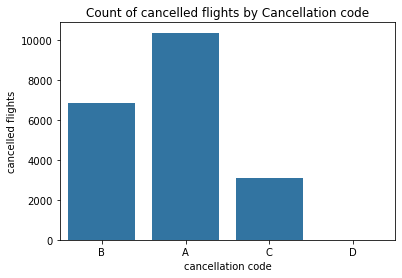

In [6]:
sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', color = sb.color_palette()[0] )
plt.title('Count of cancelled flights by Cancellation code')
plt.xlabel('cancellation code')
plt.ylabel('cancelled flights');

## Departure Delay vs. Date | Cancelled flights vs. Date

> A deep relationship occurs between the date of the flight and its delay or cancellation. We can see the Quarter, Month, and Day of the week where these delays and cancellations happen the most.

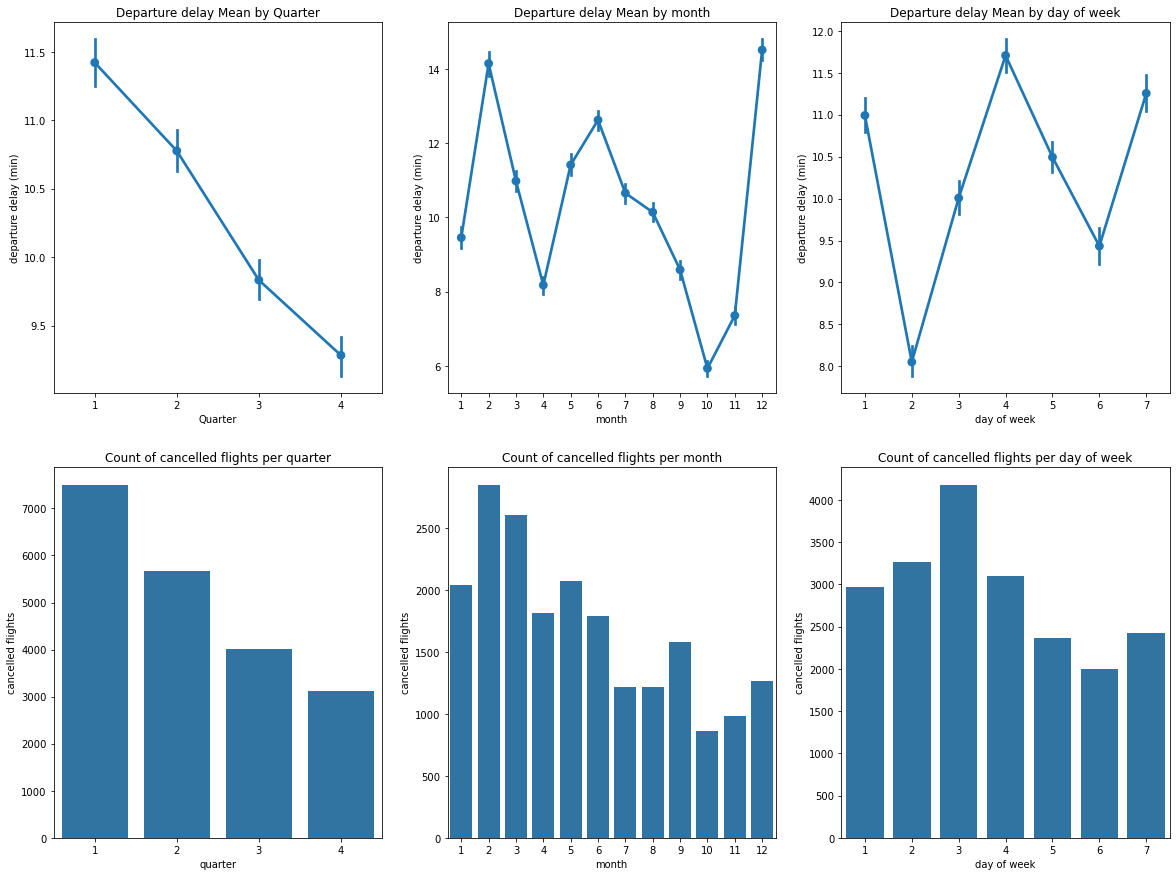

In [12]:
plt.figure(figsize=[20, 15])

plt.subplot(2,3,1)
sb.pointplot(data = df, x = 'QUARTER', y = 'DEP_DELAY')
plt.title('Departure delay Mean by Quarter')
plt.xlabel('Quarter')
plt.ylabel('departure delay (min)')

plt.subplot(2,3,2)
sb.pointplot(data = df, x = 'MONTH', y = 'DEP_DELAY')
plt.title('Departure delay Mean by month')
plt.xlabel('month')
plt.ylabel('departure delay (min)');

plt.subplot(2,3,3)
sb.pointplot(data = df, x = 'DAY_OF_WEEK', y = 'DEP_DELAY')
plt.title('Departure delay Mean by day of week')
plt.xlabel('day of week')
plt.ylabel('departure delay (min)')

plt.subplot(2,3,4)
sb.countplot(data = df_cancelled , x = 'QUARTER', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per quarter')
plt.xlabel('quarter')
plt.ylabel('cancelled flights')

plt.subplot(2,3,5)
sb.countplot(data = df_cancelled , x = 'MONTH', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per month')
plt.xlabel('month')
plt.ylabel('cancelled flights')

plt.subplot(2,3,6)
sb.countplot(data = df_cancelled , x = 'DAY_OF_WEEK', color = sb.color_palette()[0])
plt.title('Count of cancelled flights per day of week')
plt.xlabel('day of week')
plt.ylabel('cancelled flights');

## Average Delay per departure Airport by cause of delay

>in this plot we are looking at the AVERAGE delay in each of the 5 airports from the different causes of delay.

- On average, the highest delays happen in SFO airport caused by Late aircraft. the delays is 33 minutes.
- The average delay caused by security is 0 minutes (no delay) in all 5 airports.
- weather delays are only 1 minutes long on avergae in all the 5 airports.
- Average NAS delays range from 6minues to 16 minutes.
- Carrier average delays are the second highest and range from 16 minutes to 23 minutes.
- The longest delays happen because of Late aircraft in all the 5 airports and range on average from 21 minutes to 33 minutes.



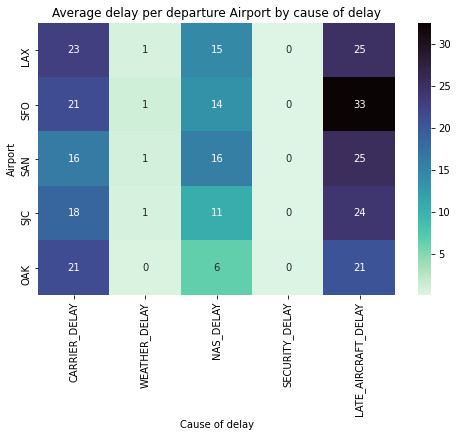

In [14]:
a = df.ORIGIN.value_counts()[:5]
a = a.index

b = df.groupby('ORIGIN').mean()
ct_counts = b.loc[a][['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

plt.figure(figsize = [8, 5])

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cmap = 'mako_r')
plt.title('Average delay per departure Airport by cause of delay')
plt.xlabel('Cause of delay')
plt.ylabel('Airport');

## Cancelled flights count per cancellation reason by Quarter, Month, and Day of week

This is a plot of the cancelled flights count by cancellation code per quarter, month, and day of the week.

First, the day of week :
- Carrier delays are the cause of flight cancellation the most on Wednesday.

Second, the month :
- Carrier delays cancel more flights on March and May
- Weather delays are the reason for flight cancellation the most from November to March. (winter season)
- NAS delays are causing flights to be cancelled significantly on September.

Finally, the Quarter :
- The first quarter is where fligths got delayed the most due to weather.
- Carrier delays caused more flight cancellation in the second quarter.
- NAS delays cancelled flights on the first and third quarter the most.

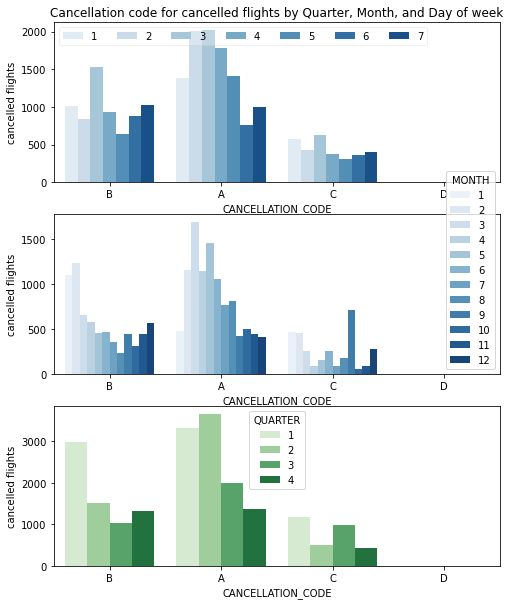

In [16]:
plt.figure(figsize = [8, 10])

plt.subplot(3, 1, 1)
ax = sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', hue= 'DAY_OF_WEEK', palette = 'Blues' )
ax.legend(ncol = 7, framealpha = 0.3)
plt.title('Cancellation code for cancelled flights by Quarter, Month, and Day of week')
plt.ylabel('cancelled flights')
          
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', hue= 'MONTH', palette = 'Blues')
plt.ylabel('cancelled flights')

ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_cancelled, x = 'CANCELLATION_CODE', hue= 'QUARTER', palette = 'Greens' )
plt.ylabel('cancelled flights');